In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# TODO:
# 1. Load the wine dataset (complete)
# 2. Perform PCA(complete)
# 3. Visualize PCA results (e.g., scatter plot, explained variance) (complete)
#which ever you complete put complete infront of it

The wine data set has around 170 components and 13 features since there are 13 features we cant plot it so we you PCA to reduce the dimension but hopefully keep the wines in the group they belong and by group is what ever we choose to group them with.

In [11]:
#Load and scale the wine dataset
def load_and_scale_data():
    
    # Load wine data from sklearn.datasets
    wine = load_wine()
    data = wine.data
    target = wine.target

    # Standardize the features using StandardScaler
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)
    return scaled_data, target, wine.feature_names
   

In [12]:
#Perform PCA using SVD
def pca_svd(data):
    # Perform Singular Value Decomposition (SVD)
    # Return the left singular vectors (U), singular values (s), and right singular vectors (VT)
    U, s, VT = np.linalg.svd(data.T)
    return U, s, VT

In [13]:
#Plot the first two principal components
def plot_first_two_pcs(U, data, target):
    # Calculate the first two principal components
    # Create a scatter plot of the first two principal components
    # Color code points according to the target variable

    k = 2  # number of components to keep
    Uk = U[:, :k]
    x_pca = np.dot(data, Uk)

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=target, cmap='plasma')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)
    plt.title('PCA of Wine Dataset')
    plt.show()


In [ ]:
#Create a heatmap for the first two principal components
def heatmap_first_two_pcs(U, feature_names):
    # Create a heatmap of the loadings of the first two principal components
    k = 13  # number of components to keep
    Uk = U[:, :k]
    plt.figure(figsize=(10, 5))
    sns.heatmap(Uk, cmap='coolwarm', yticklabels=['PC1', 'PC2'])
    plt.xticks(np.arange(len(feature_names)) + 0.5, feature_names, rotation=90)
    plt.title('Heatmap of the First Two Principal Components')
    plt.show()

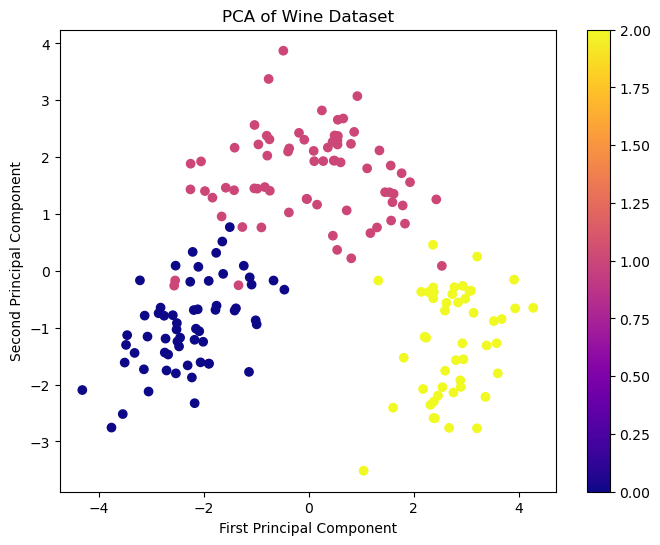

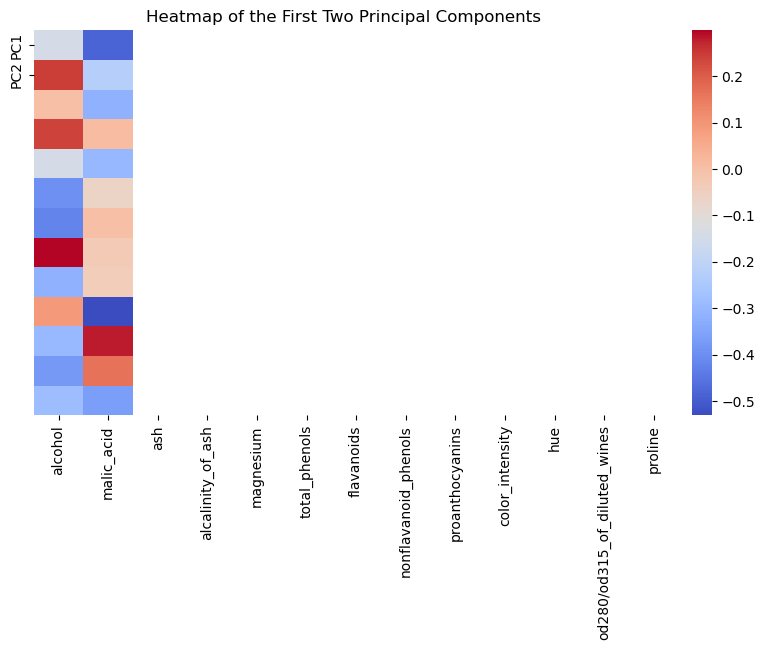

In [ ]:
if __name__ == "__main__":
    # Load and preprocess data
    wine_scaled, wine_target, wine_feature_names = load_and_scale_data()
    
    # Perform PCA
    U, s, VT = pca_svd(wine_scaled)
    
    # Plotting functions
    plot_first_two_pcs(U, wine_scaled, wine_target)
    heatmap_first_two_pcs(U, wine_feature_names)